In [2]:
import pandas as pd
import numpy as np

In [3]:
df_gen_age = pd.read_excel('C:/Users/PiGiraffe0/Documents/SQL/semi_project/project_02/Pretreatment\gen_and_age/gender_age_combination.xlsx')

In [4]:
# 한글 깨짐 방지
# 원리는 색상 폰트들에서 한글을 인식하는 폰트로 바꾸어주는 구조
def font_kor_fixed() :
    from matplotlib import font_manager, rc
    import platform 

    if platform.system() == 'Windows': 
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    else: 
        print('Check your OS system')

font_kor_fixed()

In [43]:
for i in range(1,6) :
    print(df_gen_age[df_gen_age.columns.to_list()[i]].values[2])

29108
848163
835535
722169
555849


In [39]:
# importing package
import matplotlib.pyplot as plt
x = ['A', 'B', 'C', 'D' , 'E']

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.show()


In [44]:
df_gen_age.columns.to_list()[1:]

,년도/성별,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상
0,2017년 전체,61058,1478618,1314444,1393595,1816831
1,2021년 전체,54052,2068435,1471387,1747480,2471000
2,2017년 남자,29108,848163,835535,722169,555849
3,2021년 남자,25015,1145447,939487,943568,836831
4,2017년 여자,31950,630455,478909,671426,1260982
5,2021년 여자,29037,922988,531900,803912,1634169


#### 파이차트를 그리기 위해서는 총합이 필요하다.

In [298]:
df_gen_age_02 = df_gen_age
series_sum = df_gen_age_02.drop(['년도/성별'] , axis = 1).sum(axis=1)

In [300]:
df_gen_age_02.insert(loc = 6,column = '총합' , value = series_sum)
df_gen_age_02

,년도/성별,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상,총합
0,2017년 전체,61058,1478618,1314444,1393595,1816831,6064546
1,2021년 전체,54052,2068435,1471387,1747480,2471000,7812354
2,2017년 남자,29108,848163,835535,722169,555849,2990824
3,2021년 남자,25015,1145447,939487,943568,836831,3890348
4,2017년 여자,31950,630455,478909,671426,1260982,3073722
5,2021년 여자,29037,922988,531900,803912,1634169,3922006


#### 파이 차트 제작을 위해 데이터를 17년도와 21년도로 나누어준다.
- 년도별 전체 데이터는 필요하지 않다.

In [301]:
df_gen_age_02.columns[1:6]

Index(['19세 이하', '20 ~ 34세', '35 ~ 49세', '50 ~ 64세', '65세 이상'], dtype='object')

In [302]:
df_2017 = df_gen_age_02.loc[[2 , 4]].reset_index(drop = True)
df_2021 = df_gen_age_02.loc[[3 , 5]].reset_index(drop = True)

In [303]:
#df_2017 = df_2017.rename(columns = {'19세 이하' : 'A' , '20 ~ 34세' : 'B' , '35 ~ 49세' : 'C' , '50 ~ 64세' : 'D' , '65세 이상' : 'E'})

In [304]:
df_2017.drop(['총합'] , axis = 1).loc[[0]]

,년도/성별,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상
0,2017년 남자,29108,848163,835535,722169,555849


In [305]:
a = df_2017.drop(['총합' , '년도/성별'] , axis = 1).loc[[0]]
b = df_2017.drop(['총합' , '년도/성별'] , axis = 1).loc[[1]].reset_index(drop=True)
df_2017_in_pie = pd.concat([a ,b ] , axis = 1)
df_2017_in_pie

,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상
0,29108,848163,835535,722169,555849,31950,630455,478909,671426,1260982


In [306]:
df_2017_in_pie_trans = df_2017_in_pie.transpose().reset_index(drop=False).rename(columns={'index' : '연령' , 0 : '가구 수'})

In [307]:
df_2017_in_pie_trans

,연령,가구 수
0,19세 이하,29108
1,20 ~ 34세,848163
2,35 ~ 49세,835535
3,50 ~ 64세,722169
4,65세 이상,555849
5,19세 이하,31950
6,20 ~ 34세,630455
7,35 ~ 49세,478909
8,50 ~ 64세,671426
9,65세 이상,1260982


In [308]:
df_2021

,년도/성별,19세 이하,20 ~ 34세,35 ~ 49세,50 ~ 64세,65세 이상,총합
0,2021년 남자,25015,1145447,939487,943568,836831,3890348
1,2021년 여자,29037,922988,531900,803912,1634169,3922006


### 년도별 남녀 1인 가구 수 구성비

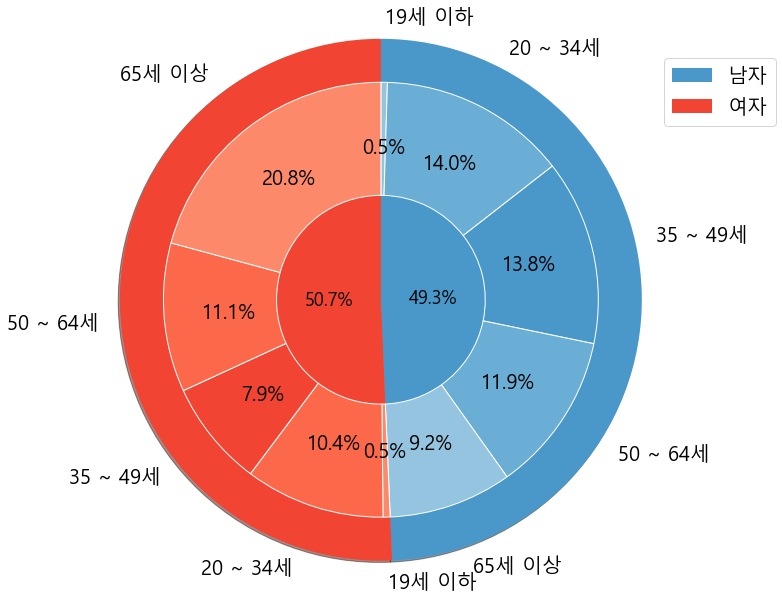

In [326]:
font_kor_fixed()

import matplotlib.pyplot as plt

# 부채꼴이 중심에서 벗어나는 정도. 소수점
# explode = [0.1 , 0.1]
wedgeprops={'width': 1.3, 'edgecolor': 'w', 'linewidth': 1}


# p_out 
plt.pie( df_2017['총합'] ,             # data 이 때 총계는 없어야 함
         #labels=df_2017['년도/성별'] , # 라벨링
         autopct='%.1f%%' ,        # 퍼센테이지 1까지 출력
         startangle = 90 ,         # 시작 각도
         counterclock = False ,    # 회전 방향 False 시계 True 반시계
         shadow = True ,
         radius = 3 ,
         labeldistance = 0.9 ,    #explode = explode         # 부채꼴이 중심에서 벗어남 
         pctdistance = 0.2 ,
         #wedgeprops=wedgeprops ,
         textprops={'fontsize': 18} ,
         colors = [plt.cm.Blues(0.6) , plt.cm.Reds(0.6)]
               ) 

# p_in 
plt.pie( df_2017_in_pie_trans['가구 수'] ,             # data 이 때 총계는 없어야 함
         labels=df_2017_in_pie_trans['연령'] , # 라벨링
         autopct='%.1f%%' ,        # 퍼센테이지 1까지 출력
         startangle = 90 ,         # 시작 각도
         counterclock = False ,    # 회전 방향 False 시계 True 반시계
         shadow = True ,
         radius = 2.5 ,
         labeldistance = 1.3 ,
         pctdistance = 0.7 ,
         wedgeprops=wedgeprops ,
         rotatelabels = False ,
         textprops={'fontsize': 20} ,
         colors=[plt.cm.Blues(0.4), plt.cm.Blues(0.5), plt.cm.Blues(0.6), plt.cm.Blues(0.5), plt.cm.Blues(0.4) ,
                 plt.cm.Reds(0.4), plt.cm.Reds(0.5), plt.cm.Reds(0.6), plt.cm.Reds(0.5), plt.cm.Reds(0.4)]

         #explode = explode         # 부채꼴이 중심에서 벗어남   
       ) 
plt.legend(('남자' , '여자') , fontsize = 20 , loc = (1.8,1.3))
#mybox={'facecolor':'w','edgecolor':'b','boxstyle':'round','alpha':1}
#plt.text(4,1,'A : 19세 이하\nB : 20 ~ 34세', bbox=mybox , fontsize = 20)




# table

#val1 = ['분류' , '단위(%)'] 
#val2 = ["{:02X}".format(10 * i) for i in range(6)] 
#val3 = [["" for c in range(2)] for r in range(6)] 
#plt.table(cellText = val3,
#         rowLabels = val2,  
#          colLabels = val1, 
#          rowColours =["palegreen"] * 10,  
#          colColours =["palegreen"] * 10, 
#          #cellLoc ='center',  
#          loc = (15,1))

#plt.title('파이차트 그리는 중', size= 15 , color = 'black')
plt.show()
# 우선 각 영역의 비율과 이름을 ratio와 labels로 지정해주고,
# pie() 함수에 순서대로 입력합니다.
# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.


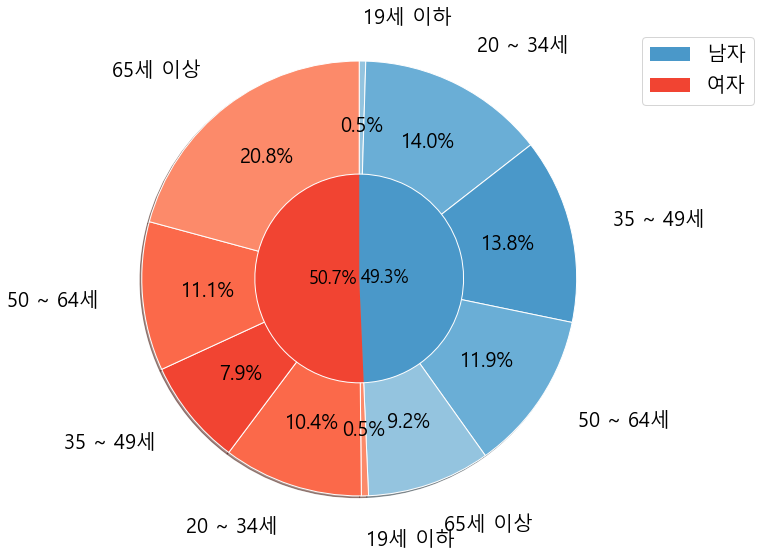

In [338]:
font_kor_fixed()

import matplotlib.pyplot as plt

# 부채꼴이 중심에서 벗어나는 정도. 소수점
# explode = [0.1 , 0.1]
wedgeprops={'width': 1.3, 'edgecolor': 'w', 'linewidth': 1}


# p_out 
plt.pie( df_2017['총합'] ,             # data 이 때 총계는 없어야 함
         #labels=df_2017['년도/성별'] , # 라벨링
         autopct='%.1f%%' ,        # 퍼센테이지 1까지 출력
         startangle = 90 ,         # 시작 각도
         counterclock = False ,    # 회전 방향 False 시계 True 반시계
         shadow = True ,
         radius = 1.5 ,
         labeldistance = 0.9 ,    #explode = explode         # 부채꼴이 중심에서 벗어남 
         pctdistance = 0.2 ,
         #wedgeprops=wedgeprops ,
         textprops={'fontsize': 18} ,
         colors = [plt.cm.Blues(0.6) , plt.cm.Reds(0.6)]
               ) 

# p_in 
plt.pie( df_2017_in_pie_trans['가구 수'] ,             # data 이 때 총계는 없어야 함
         labels=df_2017_in_pie_trans['연령'] , # 라벨링
         autopct='%.1f%%' ,        # 퍼센테이지 1까지 출력
         startangle = 90 ,         # 시작 각도
         counterclock = False ,    # 회전 방향 False 시계 True 반시계
         shadow = True ,
         radius = 2.5 ,
         labeldistance = 1.2 ,
         pctdistance = 0.7 ,
         wedgeprops=wedgeprops ,
         rotatelabels = False ,
         textprops={'fontsize': 20} ,
         colors=[plt.cm.Blues(0.4), plt.cm.Blues(0.5), plt.cm.Blues(0.6), plt.cm.Blues(0.5), plt.cm.Blues(0.4) ,
                 plt.cm.Reds(0.4), plt.cm.Reds(0.5), plt.cm.Reds(0.6), plt.cm.Reds(0.5), plt.cm.Reds(0.4)]

         #explode = explode         # 부채꼴이 중심에서 벗어남   
       ) 
plt.legend(('남자' , '여자') , fontsize = 20 , loc = (1.8,1.3))
#mybox={'facecolor':'w','edgecolor':'b','boxstyle':'round','alpha':1}
#plt.text(4,1,'A : 19세 이하\nB : 20 ~ 34세', bbox=mybox , fontsize = 20)




# table

#val1 = ['분류' , '단위(%)'] 
#val2 = ["{:02X}".format(10 * i) for i in range(6)] 
#val3 = [["" for c in range(2)] for r in range(6)] 
#plt.table(cellText = val3,
#         rowLabels = val2,  
#          colLabels = val1, 
#          rowColours =["palegreen"] * 10,  
#          colColours =["palegreen"] * 10, 
#          #cellLoc ='center',  
#          loc = (15,1))

# 이미지 잘림 방지


#plt.title('파이차트 그리는 중', size= 15 , color = 'black')
# plt.show()
# 우선 각 영역의 비율과 이름을 ratio와 labels로 지정해주고,
# pie() 함수에 순서대로 입력합니다.
# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
plt.savefig('C:/Users/PiGiraffe0/Documents/SQL/semi_project/subfile/pie_sample_01.png' , dpi = 150 , bbox_inches = 'tight')

In [267]:
# https://dsbook.tistory.com/20